To use CatBoost we should install the following package



In [105]:
# !pip3 install catboost

***Import the libraries***

In [106]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from xgboost import XGBRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor

***Reading data***

In [107]:
data = pd.read_excel("Info_BDApnea_QuironMalaga.xlsx", sheet_name='Hoja1')
data.head(5)

,Patient,Comentarios,Audios tumbado,Fotos,Audio fs KHz,Gender,EPWORTH,IAH,IAH Supino,IAH Lateral,Peso,Talla,IMC,Edad,PerCervical,Fumador,Roncador,Enfermedades,Sala/Ruidos,Imagen,Dialecto,DIST EXT OJOS,DIST BARB-LOB,Cansancio,Concentrarse,PerdRespNoche,HiperT,EstHOSP
0,P0001,es el Patient0002 (fotos) 3 (sentado) y 4 (tum...,si,si,16,hombre,NaN,71.0,-1,-1,82,168.0,-1.0,39.0,-1.0,ns,ns,Septo_Nasal_Desviado,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P0002,Es el Patient0006 (sentado) y 7 (tumbado),si,si,16,hombre,NaN,29.6,-1,-1,119,174.0,-1.0,56.0,48.0,si,ns,nd,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P0003,"Patient 8, 9 y 10",si,si,16,hombre,NaN,56.0,-1,-1,-1,-1.0,-1.0,46.0,43.0,si,ns,nd,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P0004,Patient 13 y 14,si_codigos,si,16,hombre,NaN,19.7,-1,-1,78,168.0,-1.0,39.0,42.0,no,ns,Hiperactividad_bronquial,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P0005,Patient0015 los códigos QMH5,si_codigos,si,16,hombre,NaN,9.0,-1,-1,80,173.0,-1.0,32.0,40.0,no,ns,Septo_Nasal_Desviado_Operado,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***Choosing the features***

In [108]:
OSA_df = data[['Gender','IAH','Peso',
               		 'Talla','Edad', 'PerCervical', 'Fumador']]

***Data preprocessing for both problems***

*Renaming the features (translation from Spanish into English)*

In [109]:
OSA_df.columns = ['Gender','IAH','Weight',
                 	 'Height','Age','Cervical', 'Smoker']

*Droping the NaN values of the dataset based on the 'Gender' feature*

In [110]:
OSA_df_reduced = OSA_df.dropna(subset = ["Gender"])

*Displaying the first 5 records of the dataset*

In [111]:
OSA_df_reduced.head(5)

,Gender,IAH,Weight,Height,Age,Cervical,Smoker
0,hombre,71.0,82,168.0,39.0,-1.0,ns
1,hombre,29.6,119,174.0,56.0,48.0,si
2,hombre,56.0,-1,-1.0,46.0,43.0,si
3,hombre,19.7,78,168.0,39.0,42.0,no
4,hombre,9.0,80,173.0,32.0,40.0,no


*Checking the information about dataset*

In [112]:
OSA_df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 682
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gender    683 non-null    object 
 1   IAH       649 non-null    float64
 2   Weight    678 non-null    object 
 3   Height    677 non-null    float64
 4   Age       678 non-null    float64
 5   Cervical  678 non-null    float64
 6   Smoker    680 non-null    object 
dtypes: float64(4), object(3)
memory usage: 42.7+ KB


In [113]:
OSA_df_reduced['Weight'] = OSA_df_reduced['Weight'].apply(pd.to_numeric, errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [114]:
OSA_df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 682
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gender    683 non-null    object 
 1   IAH       649 non-null    float64
 2   Weight    676 non-null    float64
 3   Height    677 non-null    float64
 4   Age       678 non-null    float64
 5   Cervical  678 non-null    float64
 6   Smoker    680 non-null    object 
dtypes: float64(5), object(2)
memory usage: 42.7+ KB


In [115]:
OSA_df_reduced['Gender'].value_counts()

hombre    488
mujer     195
Name: Gender, dtype: int64

In [116]:
OSA_df_reduced['Smoker'].value_counts()

no           373
si           165
antiguo      119
ns            16
poco           6
si (poco)      1
Name: Smoker, dtype: int64

In [117]:
OSA_df_reduced.loc[OSA_df_reduced['Smoker'] == 
                   'poco', 'Smoker'] = 'si'
OSA_df_reduced.loc[OSA_df_reduced['Smoker'] == 
                   'si (poco)', 'Smoker'] = 'si'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [118]:
OSA_df_reduced['Smoker'].value_counts()

no         373
si         172
antiguo    119
ns          16
Name: Smoker, dtype: int64

In [119]:
OSA_df_reduced.loc[OSA_df_reduced['Smoker'] == 
                   'ns', 'Smoker'] = np.NaN

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [120]:
OSA_df_reduced['Smoker'].value_counts()

no         373
si         172
antiguo    119
Name: Smoker, dtype: int64

In [121]:
OSA_df_reduced.describe()


,IAH,Weight,Height,Age,Cervical
count,649.000000,676.000000,677.000000,678.000000,678.000000
mean,20.364653,87.665680,171.144756,49.280236,40.188053
std,18.692784,18.542861,11.661385,12.851542,5.746654
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,6.300000,75.000000,165.000000,40.000000,38.000000
50%,14.200000,86.000000,171.000000,49.000000,41.000000
75%,30.000000,98.000000,178.000000,59.000000,43.000000
max,108.600000,165.000000,199.000000,88.000000,53.000000


In [122]:
OSA_df_reduced = OSA_df_reduced.replace(-1.0,np.NaN)

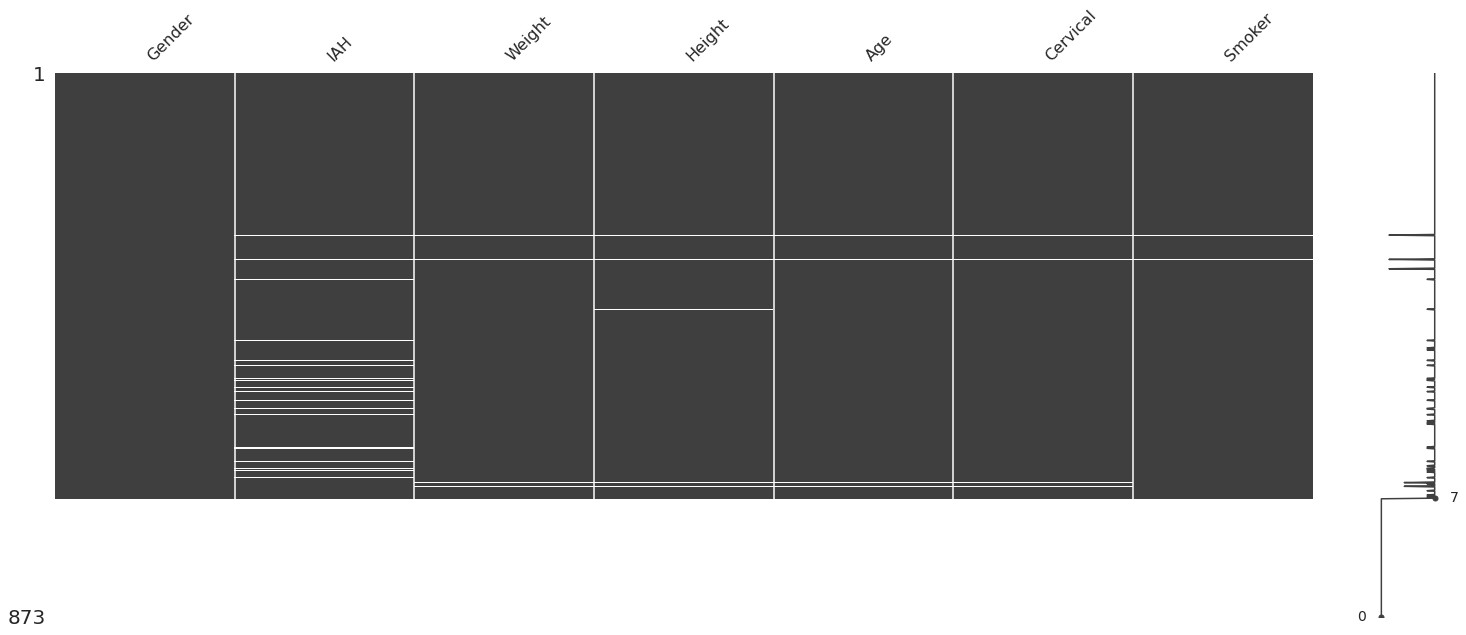

In [123]:
msno.matrix(OSA_df)

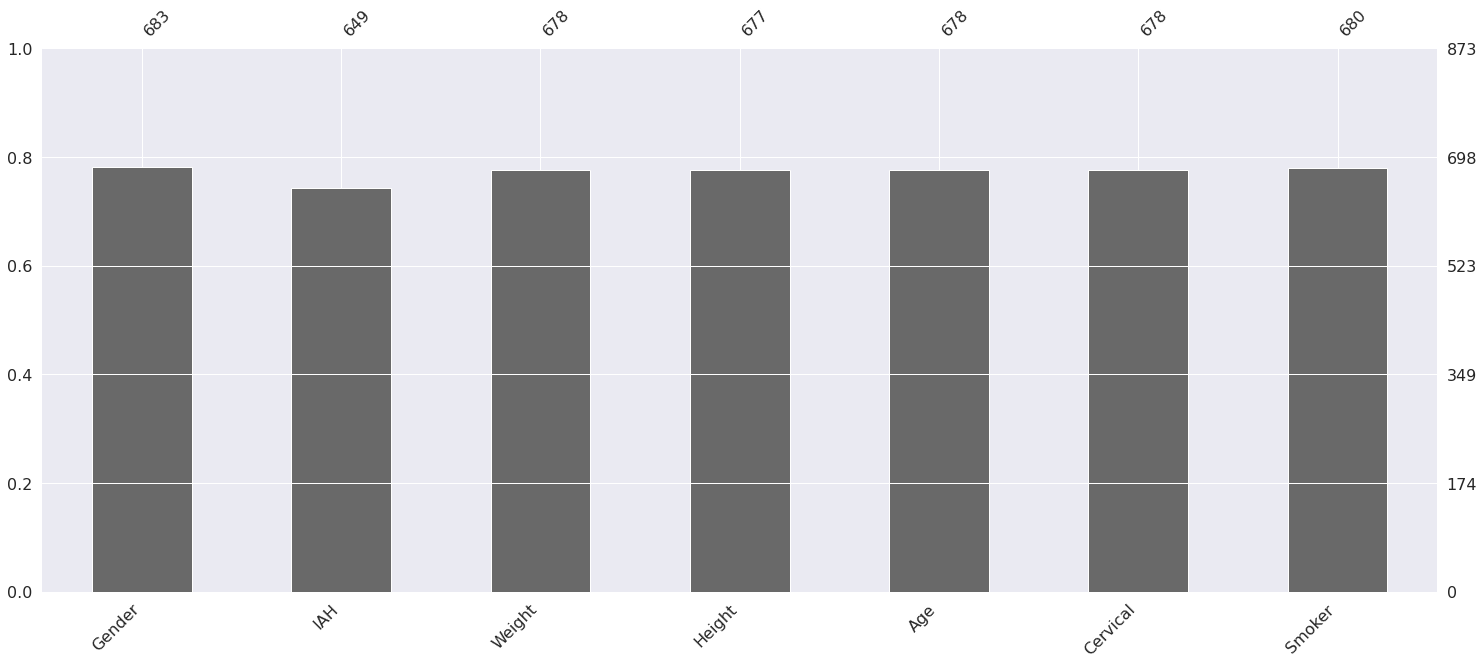

In [124]:
msno.bar(OSA_df)

In [125]:
OSA_df_cleaned = OSA_df_reduced.dropna()

In [126]:
OSA_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625 entries, 1 to 682
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gender    625 non-null    object 
 1   IAH       625 non-null    float64
 2   Weight    625 non-null    float64
 3   Height    625 non-null    float64
 4   Age       625 non-null    float64
 5   Cervical  625 non-null    float64
 6   Smoker    625 non-null    object 
dtypes: float64(5), object(2)
memory usage: 39.1+ KB


In [127]:
OSA_df_cleaned = OSA_df_cleaned.reset_index(drop=True)
OSA_before_encoding = OSA_df_cleaned.copy()

In [128]:
OSA_df_cleaned.Smoker.value_counts()

no         351
si         161
antiguo    113
Name: Smoker, dtype: int64

In [129]:
OSA_df_cleaned.describe()

,IAH,Weight,Height,Age,Cervical
count,625.000000,625.000000,625.00000,625.000000,625.00000
mean,20.379296,87.692800,171.36800,49.443200,40.62800
std,18.642982,18.271941,9.49809,12.362723,3.97705
min,0.000000,48.000000,144.00000,20.000000,30.00000
25%,6.300000,75.000000,165.00000,40.000000,38.00000
50%,14.400000,86.000000,171.00000,49.000000,41.00000
75%,30.000000,98.000000,178.00000,59.000000,43.00000
max,108.600000,165.000000,197.00000,88.000000,53.00000


In [130]:
labelencoder = LabelEncoder()
OSA_df_cleaned['Gender'] = labelencoder.fit_transform(OSA_df_cleaned['Gender'])
OSA_df_cleaned['Smoker'] = labelencoder.fit_transform(OSA_df_cleaned['Smoker'])

In [131]:
OSA_df_cleaned['BMI'] = OSA_df_cleaned['Weight']/((OSA_df_cleaned['Height']/100)**2)

In [132]:
OSA_df_cleaned['Weight status'] = pd.cut(OSA_df_cleaned['BMI'], bins=[0, 18.5, 24.9, 29.9, float('Inf')], labels=['Underweight', 'Normal', 'Overweight', 'Very overweight'])

In [133]:
OSA_df_cleaned['Weight status'] = labelencoder.fit_transform(OSA_df_cleaned['Weight status'])

In [134]:
OSA_df_cleaned['Age group'] = pd.cut(OSA_df_cleaned['Age'], bins=[0, 40, float('Inf')], 
                                         labels=['Low Risk', 'High Risk'])
OSA_df_cleaned['Age group'] = labelencoder.fit_transform(OSA_df_cleaned['Age group'])
OSA_df_cleaned

,Gender,IAH,Weight,Height,Age,Cervical,Smoker,BMI,Weight status,Age group
0,0,29.6,119.0,174.0,56.0,48.0,2,39.305060,3,0
1,0,19.7,78.0,168.0,39.0,42.0,1,27.636054,1,1
2,0,9.0,80.0,173.0,32.0,40.0,1,26.729927,1,1
3,0,2.0,109.0,190.0,32.0,42.0,1,30.193906,3,1
4,0,34.0,86.0,169.0,39.0,42.0,1,30.110991,3,1
...,...,...,...,...,...,...,...,...,...,...
620,1,36.3,82.0,165.0,64.0,39.0,0,30.119376,3,0
621,0,9.2,105.0,180.0,35.0,45.0,1,32.407407,3,1
622,0,52.2,90.0,180.0,50.0,42.0,1,27.777778,1,0
623,1,5.4,66.0,164.0,57.0,35.0,2,24.538965,0,0


In [135]:
OSA_df_cleaned
OSA_df_cleaned.to_excel('Data_processed.xlsx', index=False)
OSA_before_encoding.to_excel('Data_processed_bef_enc.xlsx', index=False)

In [136]:
OSA_df_cleaned.describe()

,Gender,IAH,Weight,Height,Age,Cervical,Smoker,BMI,Weight status,Age group
count,625.000000,625.000000,625.000000,625.00000,625.000000,625.00000,625.000000,625.000000,625.000000,625.000000
mean,0.280000,20.379296,87.692800,171.36800,49.443200,40.62800,1.076800,29.820124,1.668800,0.283200
std,0.449359,18.642982,18.271941,9.49809,12.362723,3.97705,0.658175,5.578711,1.176997,0.450914
min,0.000000,0.000000,48.000000,144.00000,20.000000,30.00000,0.000000,18.289895,0.000000,0.000000
25%,0.000000,6.300000,75.000000,165.00000,40.000000,38.00000,1.000000,26.037494,1.000000,0.000000
50%,0.000000,14.400000,86.000000,171.00000,49.000000,41.00000,1.000000,28.731747,1.000000,0.000000
75%,1.000000,30.000000,98.000000,178.00000,59.000000,43.00000,2.000000,32.653061,3.000000,1.000000
max,1.000000,108.600000,165.000000,197.00000,88.000000,53.00000,2.000000,63.654952,3.000000,1.000000


***Regression problem***


***EDA for the Regression problem***

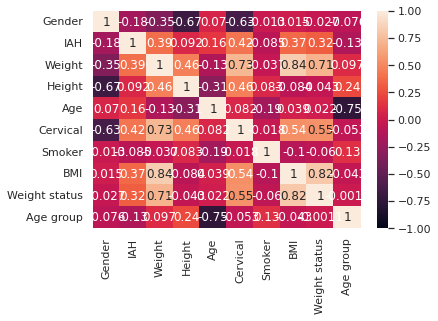

In [137]:
heatmap = sns.heatmap(OSA_df_cleaned.corr(), 
     		                 vmin=-1, vmax=1, annot=True)


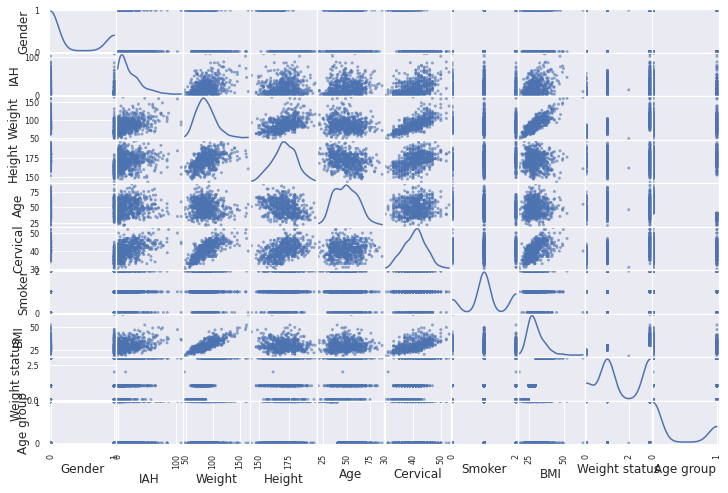

In [138]:
axes = scatter_matrix(OSA_df_cleaned, alpha=0.6, 
                      		figsize=(12, 8), diagonal='kde')


In [139]:
OSA_before_encoding['BMI'] = OSA_before_encoding['Weight']/((OSA_before_encoding['Height']/100)**2)
OSA_before_encoding['Weight status'] = pd.cut(OSA_before_encoding['BMI'], bins=[0,  24.9, 29.9, float('Inf')], labels=['Normal', 'Overweight', 'Very overweight'])
OSA_before_encoding['Age group'] = pd.cut(OSA_before_encoding['Age'], bins=[0, 40, float('Inf')], labels=['Low Risk', 'High Risk'])


In [140]:
OSA_before_encoding['Age group'].value_counts()

High Risk    448
Low Risk     177
Name: Age group, dtype: int64

In [141]:
OSA_before_encoding['Weight status'].value_counts()

Overweight         261
Very overweight    260
Normal             104
Name: Weight status, dtype: int64

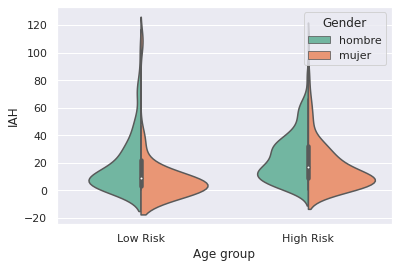

In [142]:
sns.violinplot(x="Age group", y='IAH', hue="Gender", split=True, inner="box", data=OSA_before_encoding, palette="Set2")
plt.show()

***Feature selection (Regression problem)***

In [143]:
X = OSA_df_cleaned.drop(['IAH'],axis=1)
y = OSA_df_cleaned.IAH
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

*Correlation statistic*

Feature Gender: 15.809582
Feature Weight: 106.408363
Feature Height: 3.619371
Feature Age: 15.062930
Feature Cervical: 115.654214
Feature Smoker: 4.621181
Feature BMI: 101.791336
Feature Weight status: 59.710782
Feature Age group: 9.495631


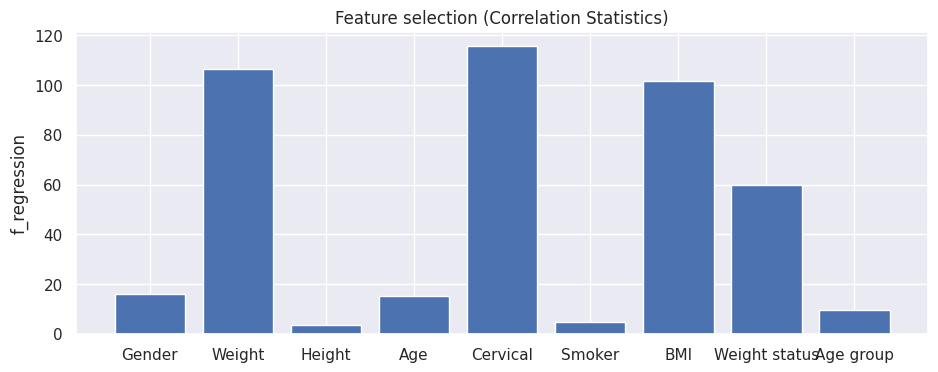

In [144]:
# configure to select all features
fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)
# return X_train_fs, X_test_fs, fs
for i in range(len(fs.scores_)):
	print('Feature %s: %f' % (X.columns[i], fs.scores_[i]))
# plot the scores
labels = ['Gender', 'Weight', 'Height', 'Age',
          'Cervical', 'Smoker', 'BMI', 'Weight status', 'Age group']
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(11,4), dpi= 100)
ax.set_xticks(x) 
ax.set_xticklabels(labels)
ax.set_ylabel('f_regression')
ax.set_title('Feature selection (Correlation Statistics)')
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

*Mutual information*

Feature Gender: 0.018839
Feature Weight: 0.082321
Feature Height: 0.029632
Feature Age: 0.054201
Feature Cervical: 0.129813
Feature Smoker: 0.073310
Feature BMI: 0.089820
Feature Weight status: 0.051846
Feature Age group: 0.077995


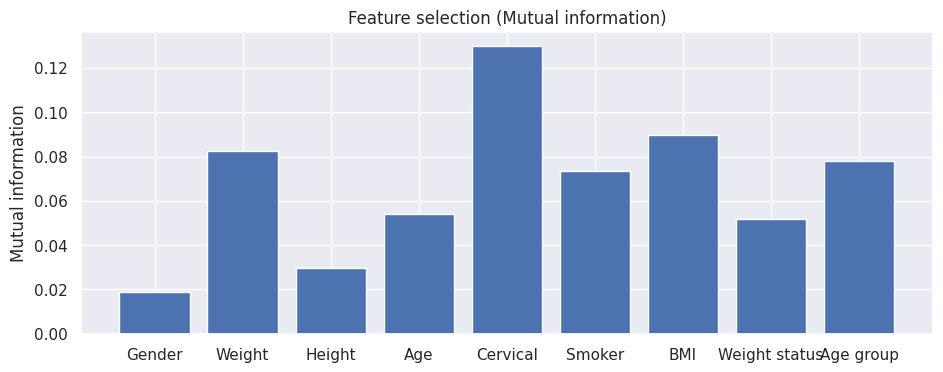

In [145]:
# configure to select all features
fs = SelectKBest(score_func=mutual_info_regression, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)
# return X_train_fs, X_test_fs, fs
for i in range(len(fs.scores_)):
	print('Feature %s: %f' % (X.columns[i], fs.scores_[i]))
# plot the scores
labels = ['Gender', 'Weight', 'Height', 'Age',
          'Cervical', 'Smoker', 'BMI', 'Weight status', 'Age group']
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(11,4), dpi= 100)
ax.set_xticks(x) 
ax.set_xticklabels(labels)
ax.set_ylabel('Mutual information')
ax.set_title('Feature selection (Mutual information)')
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

*Choosing the set of features*

In [146]:
features = ["Cervical", 'BMI', 'Age', 'Gender', 'Smoker']
X_train = X_train[features]
X_test = X_test[features]

***Scaling of the features***

In [147]:
scaler = MinMaxScaler()
X_train[features] = scaler.fit_transform(X_train[features])
X_test[features] = scaler.fit_transform(X_test[features])
X_train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,Cervical,BMI,Age,Gender,Smoker
514,0.565217,0.446254,0.294118,0.0,0.0
469,0.434783,0.245626,0.367647,0.0,0.5
6,0.521739,0.233062,0.294118,0.0,0.5
104,1.000000,0.702356,0.500000,0.0,0.5
114,0.217391,0.352925,0.191176,1.0,0.0


***Prepare the list of models for prediction***

In [148]:
# Regression_model_name = 'Linear Regression'
# Regression_model_name = 'DecisionTree'
# Regression_model_name = 'Support Vector Machines'
# Regression_model_name = 'Ridge Regression'
# Regression_model_name = 'Random Forest'
# Regression_model_name = 'XGBoost'
# Regression_model_name = 'LightGBM'
# Regression_model_name = 'CatBoost'
list_of_models = ['Linear Regression', 'DecisionTree', 'Ridge Regression',
                  'Support Vector Machines', 'Random Forest',
                  'XGBoost', 'LightGBM', 'CatBoost']

# list_of_models = ['CatBoost']

***Useful functions to make the code shorter***

In [149]:
def grid_search_func(regr_model, hyper_params, folds):
  model_cv = GridSearchCV(estimator = regr_model, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 
  model_cv.fit(X_train, y_train)
  print(model_cv.best_params_)
  best_params = model_cv.best_params_
  return best_params

def get_metrics(model, X_train, y_train, X_test, y_test):
  Trained_model = model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  RMSE = np.sqrt(mean_squared_error(predictions, y_test))
  MAE = mean_absolute_error(predictions, y_test)
  return [RMSE, MAE]

***Evaluation of  all models***

In [ ]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
array_metrics = []
for Regression_model_name in list_of_models:

  if Regression_model_name == 'Linear Regression':
    model = linear_model.LinearRegression()
    [RMSE, MAE] = get_metrics(model, X_train, y_train, X_test, y_test)
    array_metrics.append([RMSE, MAE])
    print(Regression_model_name, ':', [RMSE, MAE])

  if Regression_model_name == 'DecisionTree':
    hyper_params = {'max_depth': range(1, 5, 1),
                    'max_features': [1, 2, 3, 4, 5]}
    regr_model = DecisionTreeRegressor
    best_params = grid_search_func(regr_model(), hyper_params, folds)
    model = regr_model(**best_params)
    [RMSE, MAE] = get_metrics(model, X_train, y_train, X_test, y_test)
    array_metrics.append([RMSE, MAE])
    print(Regression_model_name, ':', [RMSE, MAE])

  if Regression_model_name == 'Support Vector Machines':
    hyper_params = {'kernel': ['linear', 'poly', 'rbf'],
                    'C' : range(1, 5, 1),
                    'degree': [2, 3, 4]}
    regr_model = SVR
    best_params = grid_search_func(regr_model(), hyper_params, folds)
    model = regr_model(**best_params)
    [RMSE, MAE] = get_metrics(model, X_train, y_train, X_test, y_test)
    array_metrics.append([RMSE, MAE])
    print(Regression_model_name, ':', [RMSE, MAE])
    
  if Regression_model_name == 'Ridge Regression':
    hyper_params = {'alpha': np.arange(0.5, 5, 0.5)}
    regr_model = linear_model.Ridge
    best_params = grid_search_func(regr_model(), hyper_params, folds)
    model = regr_model(**best_params)
    [RMSE, MAE] = get_metrics(model, X_train, y_train, X_test, y_test)
    array_metrics.append([RMSE, MAE])
    print(Regression_model_name, ':', [RMSE, MAE])

  if Regression_model_name == 'Random Forest':
    hyper_params = {'n_estimators': range(10, 200, 20),
                    'max_depth': range(1, 9, 2),
                    'min_samples_leaf': range(1, 4, 1)}
    regr_model = RandomForestRegressor
    best_params = grid_search_func(regr_model(), hyper_params, folds)
    model = regr_model(**best_params)
    [RMSE, MAE] = get_metrics(model, X_train, y_train, X_test, y_test)
    array_metrics.append([RMSE, MAE])
    print(Regression_model_name, ':', [RMSE, MAE])

  if Regression_model_name == 'XGBoost':
    hyper_params = {'n_estimators': range(10, 200, 20),
                    'max_depth': range(1, 7, 1)}
    regr_model = XGBRegressor
    best_params = grid_search_func(regr_model(), hyper_params, folds)
    model = regr_model(**best_params)
    [RMSE, MAE] = get_metrics(model, X_train, y_train, X_test, y_test)
    array_metrics.append([RMSE, MAE])
    print(Regression_model_name, ':', [RMSE, MAE])

  if Regression_model_name == 'LightGBM':
    hyper_params = {'n_estimators': range(10, 300, 30),
                    'max_depth': range(1, 7, 1),
                    'num_leaves': [10, 30, 50, 70, 100, 150]}
    regr_model = lgb.LGBMRegressor
    best_params = grid_search_func(regr_model(), hyper_params, folds)
    model = regr_model(**best_params)
    [RMSE, MAE] = get_metrics(model, X_train, y_train, X_test, y_test)
    array_metrics.append([RMSE, MAE])
    print(Regression_model_name, ':', [RMSE, MAE])

  if Regression_model_name == 'CatBoost':
    hyper_params = {'iterations': range(10, 200, 10),
                    'depth': range(1, 5, 1)}
    regr_model = CatBoostRegressor
    best_params = grid_search_func(regr_model(), hyper_params, folds)
    model = regr_model(**best_params)
    [RMSE, MAE] = get_metrics(model, X_train, y_train, X_test, y_test)
    array_metrics.append([RMSE, MAE])
    print(Regression_model_name, ':', [RMSE, MAE])

***Dispalying the results (metrics)***

In [151]:
table_metrics = pd.DataFrame(array_metrics, columns=['RMSE', 'MAE'], index = list_of_models)
table_metrics.sort_values(by='RMSE', ascending=True)

,RMSE,MAE
LightGBM,14.775296,11.902945
Random Forest,15.037943,12.060496
XGBoost,15.167377,11.699624
Support Vector Machines,15.261742,11.580226
Ridge Regression,15.416183,12.385416
Linear Regression,15.484188,12.433457
CatBoost,15.973515,12.675998
DecisionTree,16.713646,12.989686


***Plot results***

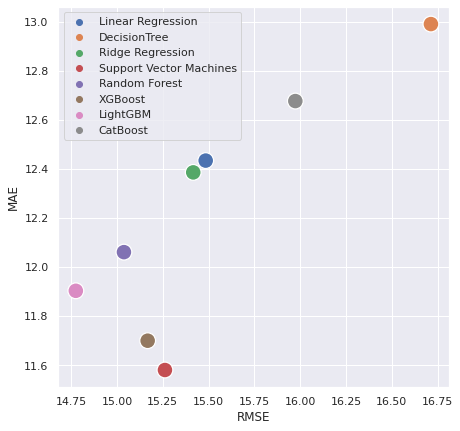

In [152]:
sns.set_theme()
plt.figure(figsize = (7,7))
fig_sns = sns.scatterplot(data=table_metrics, x="RMSE", 
                          y="MAE", hue=list_of_models, 
                          palette="deep", s=250, sizes=(40, 400))
fig = fig_sns.get_figure()
fig.savefig('Metrics_regr.png', dpi = 800)